<a href="https://colab.research.google.com/github/tzuyichao/python-basic/blob/master/colab/chapter3_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Activation, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [6]:
print(type(train_images))
print(type(train_labels))
print(type(test_images))
print(type(test_labels))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [7]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [8]:
print(train_images[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

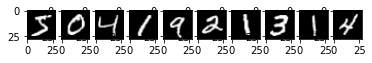

In [9]:
for i in range(10):
  plt.subplot(1, 10, i+1)
  plt.imshow(train_images[i], 'gray')
plt.show()

In [11]:
print(train_labels[0:10])

[5 0 4 1 9 2 1 3 1 4]


In [13]:
train_images = train_images.reshape((train_images.shape[0], 784))
test_images = test_images.reshape((test_images.shape[0], 784))

print(train_images.shape)
print(test_images.shape)

(60000, 784)
(10000, 784)


In [14]:
print(train_labels[0])
print(test_labels[0])

5
7


In [15]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [16]:
print(train_labels[0])
print(test_labels[0])


[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [17]:
print(train_labels.shape)
print(test_labels.shape)

(60000, 10)
(10000, 10)


In [18]:
model = Sequential()
model.add(Dense(256, activation='sigmoid', input_shape=(784,)))
model.add(Dense(128, activation='sigmoid'))
model.add(Dropout(rate=0.5))
model.add(Dense(10, activation="softmax"))

In [19]:
model.compile(loss='categorical_crossentropy', optimizer=SGD(learning_rate=0.1), metrics=['acc'])

In [20]:
history = model.fit(train_images, train_labels, batch_size=500, epochs=5, validation_split=0.2)

Epoch 1/5
96/96 [==============================] - 2s 20ms/step - loss: 2.0529 - acc: 0.2938 - val_loss: 0.9746 - val_acc: 0.8313
Epoch 2/5
96/96 [==============================] - 2s 18ms/step - loss: 1.0277 - acc: 0.7053 - val_loss: 0.5951 - val_acc: 0.8781
Epoch 3/5
96/96 [==============================] - 2s 17ms/step - loss: 0.7165 - acc: 0.8007 - val_loss: 0.4487 - val_acc: 0.8974
Epoch 4/5
96/96 [==============================] - 2s 17ms/step - loss: 0.5782 - acc: 0.8420 - val_loss: 0.3748 - val_acc: 0.9100
Epoch 5/5
96/96 [==============================] - 2s 17ms/step - loss: 0.5020 - acc: 0.8621 - val_loss: 0.3299 - val_acc: 0.9166


In [21]:
print(history.history)

{'loss': [1.6942932605743408, 0.9298614263534546, 0.6757221817970276, 0.5553425550460815, 0.4834032356739044], 'acc': [0.4438124895095825, 0.7368333339691162, 0.8139166831970215, 0.8489583134651184, 0.866854190826416], 'val_loss': [0.9746133089065552, 0.5951188802719116, 0.44874584674835205, 0.3747510313987732, 0.32991939783096313], 'val_acc': [0.831250011920929, 0.878083348274231, 0.8974166512489319, 0.9100000262260437, 0.9165833592414856]}


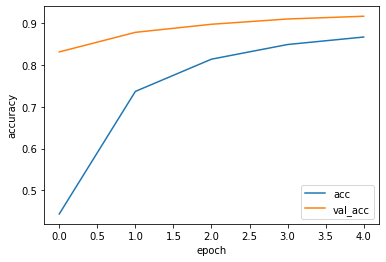

In [22]:
plt.plot(history.history['acc'], label='acc')
plt.plot(history.history['val_acc'], label='val_acc')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(loc='best')
plt.show()

In [23]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.3358 - acc: 0.9112


In [24]:
print('loss: {:.3f}\nacc: {:.3f}'.format(test_loss, test_acc))

loss: 0.336
acc: 0.911


In [25]:
test_predictions = model.predict(test_images[0:1])

In [26]:
print([round(i, 4) for i in test_predictions[0].tolist()])

[0.0006, 0.0002, 0.0007, 0.0034, 0.0003, 0.0006, 0.0, 0.9812, 0.0003, 0.0127]


In [27]:
test_predictions = np.argmax(test_predictions, axis=1)

In [28]:
print(test_predictions[0])

7


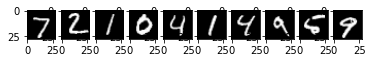

[7 2 1 0 4 1 4 9 6 9]


In [29]:
for i in range(10):
  plt.subplot(1, 10, i+1)
  plt.imshow(test_images[i].reshape((28, 28)), 'gray')

plt.show()

test_predictions = model.predict(test_images[0:10])
test_predictions = np.argmax(test_predictions, axis=1)
print(test_predictions)